In [ ]:
%pip install matplotlib scipy pandas pyarrow Jinja2

In [11]:

import pandas as pd

df = pd.read_csv("edit_history.txt", sep='\t', header=None, names=["Title", "Edit DateTime", "Probe DateTime"], usecols=["Title", "Edit DateTime"])
df['Edit DateTime'] = pd.to_datetime(df['Edit DateTime']) # text to datetime
# Sort the DataFrame by 'Title' and 'Edit DateTime' to ensure the deltas are calculated correctly
df.sort_values(by=['Title', 'Edit DateTime'], inplace=True)
# Calculate the time deltas for consecutive edits within the same title
df['Time Delta'] = df.groupby('Title')['Edit DateTime'].diff()
df.head()

,Title,Edit DateTime,Time Delta
31252,%C3%96nd%C3%B6r_Gongor,2008-01-27 15:13:00,NaT
31250,%C3%96nd%C3%B6r_Gongor,2008-01-27 15:29:00,0 days 00:16:00
31251,%C3%96nd%C3%B6r_Gongor,2008-01-27 15:29:00,0 days 00:00:00
31249,%C3%96nd%C3%B6r_Gongor,2008-01-29 13:24:00,1 days 21:55:00
31248,%C3%96nd%C3%B6r_Gongor,2008-01-29 13:25:00,0 days 00:01:00


In [12]:
# Remove rows with not-a-time (NaT) values in the 'Time Delta' column
df.dropna(subset=['Time Delta'], inplace=True)
# Sort by time delta and reset the index
df.sort_values(by='Time Delta', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Title,Edit DateTime,Time Delta
0,Kentucky_Wildcats,2023-03-31 01:54:00,0 days 00:00:00
1,Berlin_Half_Marathon,2022-11-25 10:47:00,0 days 00:00:00
2,2020_South_Carolina_Senate_election,2020-11-05 03:29:00,0 days 00:00:00
3,2020_South_Carolina_Senate_election,2020-11-05 03:28:00,0 days 00:00:00
4,2020_South_Carolina_Senate_election,2020-11-05 03:28:00,0 days 00:00:00
...,...,...,...
36315,Von_Essen_Mountain,2022-02-26 04:49:00,3575 days 12:47:00
36316,Pete_Budd,2021-06-21 16:33:00,4693 days 19:43:00
36317,WNBA_on_NBC,2022-06-05 08:44:00,4719 days 09:21:00
36318,Ardskenish,2021-09-01 04:26:00,4797 days 11:18:00


In [16]:
def seconds_to_text(seconds):
    result = []
    for unit_name, unit_seconds in [('y', 86400 * 365.25),('d', 86400),('h', 3600),('m', 60),('s', 1)]:
        if seconds >= unit_seconds:
            unit_value, seconds = divmod(seconds, unit_seconds)
            result.append(f"{int(unit_value)}{unit_name}")
    return ' '.join(result) if result else "0s"

seconds_to_text(100)

'1m 40s'

In [17]:
wait_ticks = [0, 60, 60*5, 60*15, 3600, 3600*4, 86400, 86400 * 7,86400 * 30, 86400 * 100, 86400 * 365.25, 86400 * 365.25 * 5]
wait_tick_labels = [seconds_to_text(wait_tick) for wait_tick in wait_ticks]
print(wait_tick_labels)

['0s', '1m', '5m', '15m', '1h', '4h', '1d', '7d', '30d', '100d', '1y', '5y']


In [18]:

from datetime import timedelta
import numpy as np

sorted_time_deltas_seconds = df['Time Delta'].dt.total_seconds()
results = []
for value in wait_ticks:
    greater_values = sorted_time_deltas_seconds[sorted_time_deltas_seconds > value]
    median_wait = np.median(greater_values)
    additional_wait = median_wait - value
    results.append({"Wait So Far": seconds_to_text(value), "Median Additional Wait": seconds_to_text(additional_wait)})

# Convert the results into a pandas DataFrame
results_df = pd.DataFrame(results)
results_df.style.hide(axis="index")

Wait So Far,Median Additional Wait
0s,19d 39m
1m,26d 8h 6m
5m,35d 22h 56m
15m,41d 18h 53m
1h,47d 5h 45m
4h,52d 14h 34m 30s
1d,61d 7h 41m
7d,76d 4h 8m
30d,95d 10h 10m
100d,122d 4h 18m


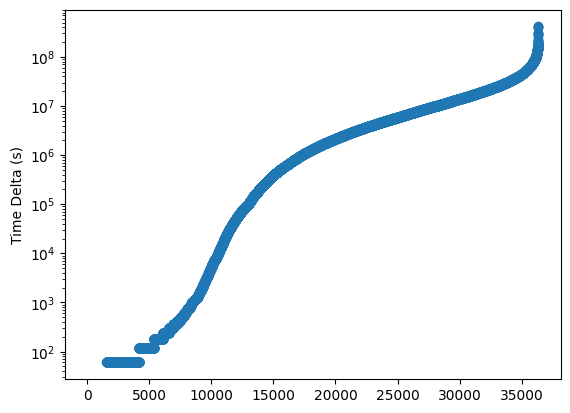

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'Time Delta' column as timedelta
df.sort_values(by='Time Delta', inplace=True)
df.reset_index(drop=True, inplace=True)
plt.plot(df['Time Delta'].dt.total_seconds(), marker='o', linestyle='None')
plt.ylabel('Time Delta (s)')
plt.yscale('log')
plt.show()

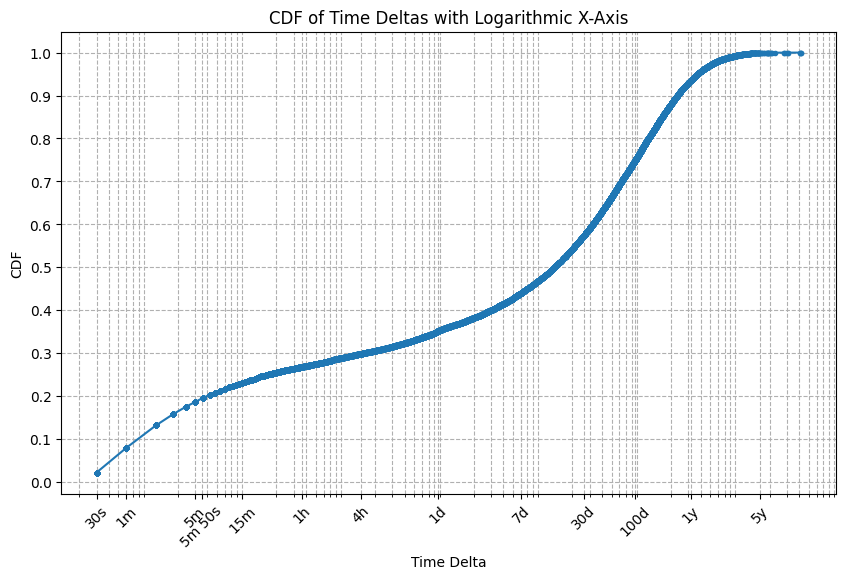

In [106]:
waits = waits.clip(lower=30) # for the plot, call 0 values 30 seconds
plt.figure(figsize=(10, 6))
plt.plot(waits, cdf, marker='.', linestyle='-')
plt.xlabel('Time Delta')
plt.ylabel('CDF')
plt.title('CDF of Time Deltas with Logarithmic X-Axis')
plt.xscale('log')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(wait_ticks, wait_tick_labels, rotation=45)
plt.grid(True, which="both", ls="--")
plt.show()


In [87]:
seconds_to_text(3600*4.5)

'4h 30m'